In [2]:
import pandas as pd

titanic_df = pd.read_csv("../titanic/train.csv")
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic_df.shape

(891, 12)

In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_df.describe()

0    S
Name: Embarked, dtype: object

In [11]:
titanic_df.loc[titanic_df["Age"].isnull(), "Age"] = titanic_df["Age"].mean()
titanic_df.loc[titanic_df["Embarked"].isnull(), "Embarked"] = titanic_df[
    "Embarked"
].mode()[0]
titanic_df["Has_Cabin"] = titanic_df["Cabin"].notnull().astype(int)
titanic_df = titanic_df.drop(["Cabin"], axis=1)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [12]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Has_Cabin    891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


<Axes: xlabel='Age', ylabel='Count'>

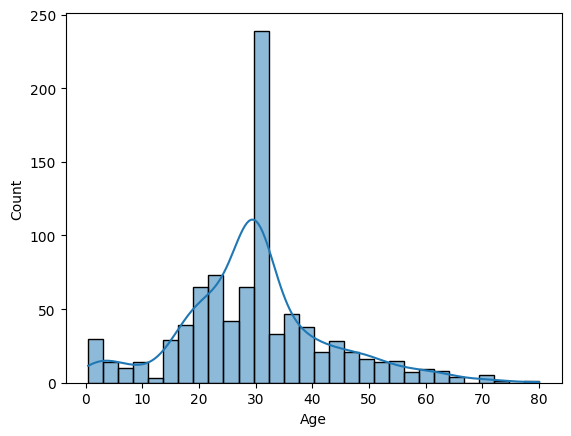

In [13]:
import seaborn as sns

sns.histplot(titanic_df, x="Age", bins=30, kde=True)

<Axes: xlabel='Fare', ylabel='Count'>

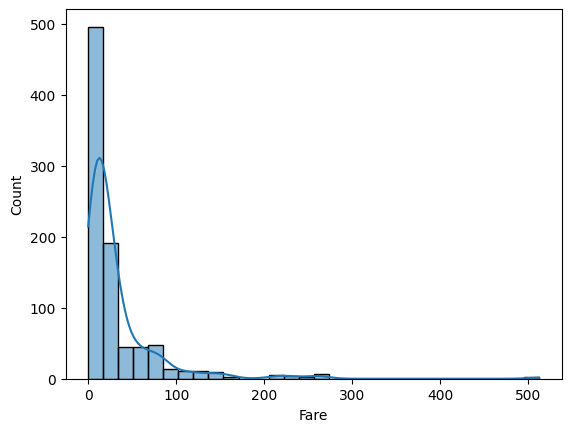

In [14]:
sns.histplot(titanic_df, x="Fare", bins=30, kde=True)

<Axes: xlabel='Age', ylabel='Count'>

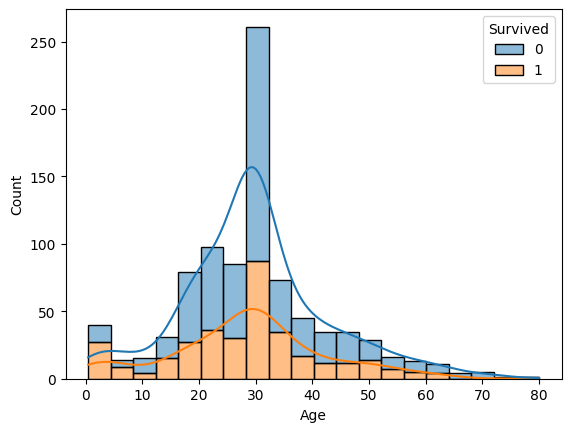

In [16]:
sns.histplot(titanic_df, x="Age", hue="Survived", bins=20, kde=True, multiple="stack")

<Axes: xlabel='Pclass', ylabel='Count'>

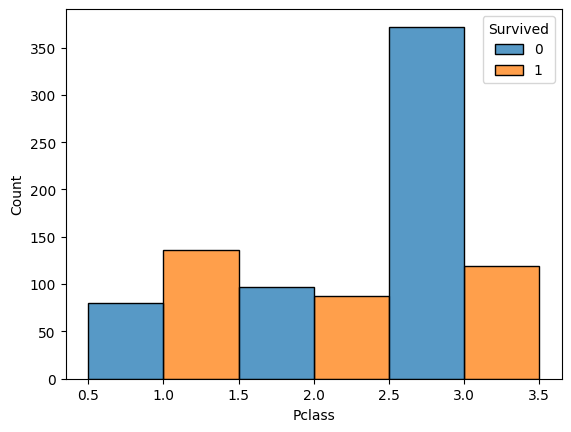

In [20]:
sns.histplot(
    data=titanic_df, x="Pclass", hue="Survived", multiple="dodge", discrete=True
)

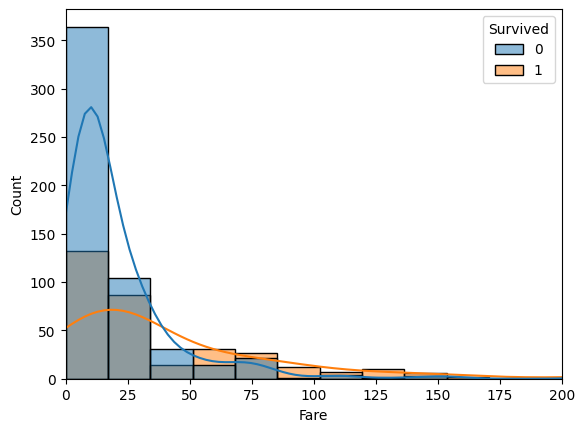

In [27]:
import matplotlib.pyplot as plt

sns.histplot(data=titanic_df, x="Fare", hue="Survived", bins=30, kde=True)
plt.xlim(0, 200)  # zoom in, since some fares are extreme outliers
plt.show()

<Axes: xlabel='Sex', ylabel='Survived'>

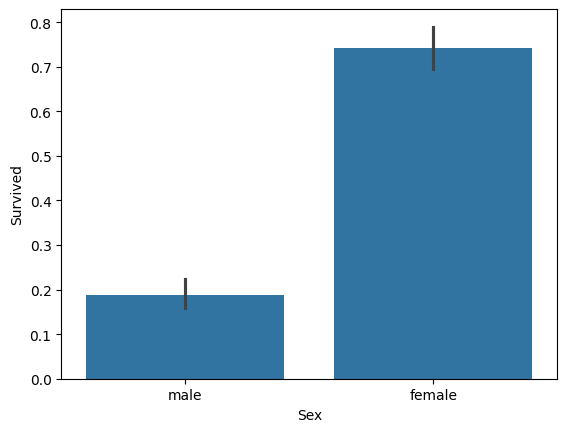

In [28]:
sns.barplot(x="Sex", y="Survived", data=titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

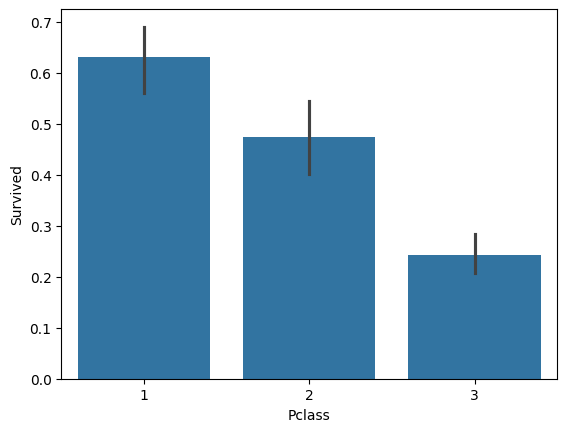

In [29]:
sns.barplot(x="Pclass", y="Survived", data=titanic_df)

<Axes: xlabel='Embarked', ylabel='Survived'>

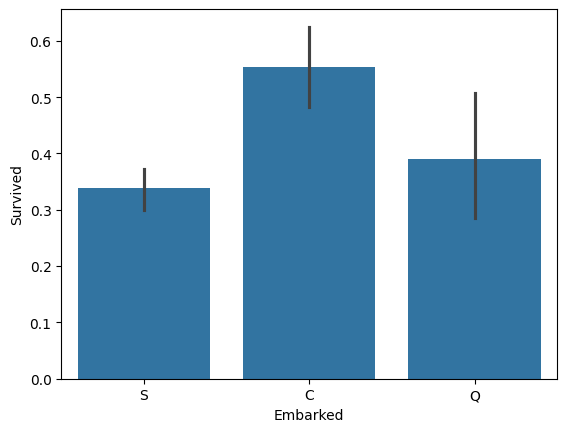

In [30]:
sns.barplot(x="Embarked", y="Survived", data=titanic_df)

In [33]:
titanic_df["AgeGroup"] = pd.cut(
    titanic_df["Age"],
    bins=[0, 12, 20, 40, 60, 80],
    labels=["Child", "Teenager", "Adult", "MiddleAged", "Senior"],
)

<Axes: xlabel='AgeGroup', ylabel='Survived'>

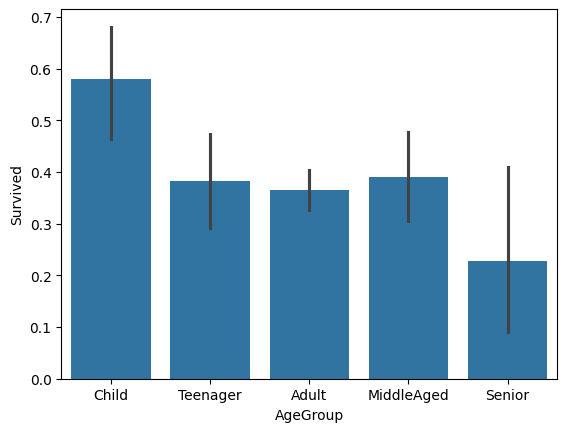

In [34]:
sns.barplot(x="AgeGroup", y="Survived", data=titanic_df)